In [501]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os
from skimage import io, color, filters
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
import tensorflow as tf
from tensorflow.keras import layers
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
keras = tf.keras
plt.style.use('ggplot')

In [340]:
# paths to csv and hdf5 (waveform/signal) files
noise_csv_path = 'data/chunk1/chunk1.csv'
noise_sig_path = 'data/chunk1/chunk1.hdf5'
eq1_csv_path = 'data/chunk2/chunk2.csv'
eq1_sig_path = 'data/chunk2/chunk2.hdf5'
eq2_csv_path = 'data/chunk3/chunk3.csv'
eq2_sig_path = 'data/chunk3/chunk3.hdf5'

# read the noise and earthquake csv files into separate dataframes:
noise = pd.read_csv(noise_csv_path)
earthquakes_1 = pd.read_csv(eq1_csv_path)
earthquakes_2 = pd.read_csv(eq2_csv_path)

# create a dataframe with all of the earthquake data
earthquakes = earthquakes_1.append(earthquakes_2)

# create a dataframe with all of the noise data
full_data = earthquakes.append(noise)

# filtering the dataframe: uncomment if needed
#df = df[(df.trace_category == 'earthquake_local') & (df.source_distance_km <= 20) & (df.source_magnitude > 3)]
#print(f'total events selected: {len(df)}')

/Users/kaelynnrose/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [341]:
# making a list of trace names for the first earthquake set
eq1_list = earthquakes_1['trace_name'].to_list()

# making a list of trace names for the second earthquake set
eq2_list = earthquakes_2['trace_name'].to_list()

# making a list of trace names for the noise set
noise_list = noise['trace_name'].to_list()




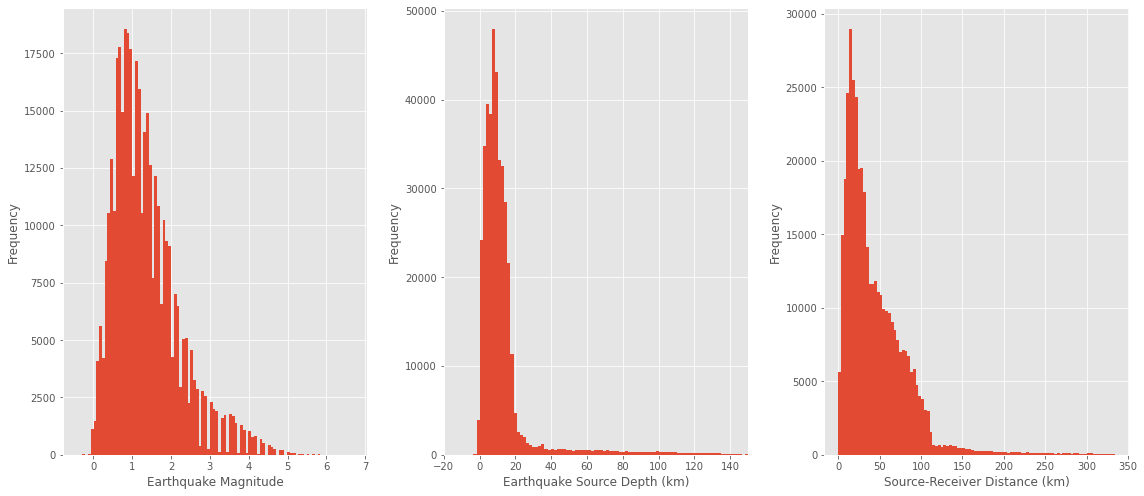

In [500]:
depths = full_data['source_depth_km'].dropna()
depths = np.array(depths)
depths = [float(x) for x in depths if x != 'None']

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,7))
ax1.hist(full_data['source_magnitude'],bins=100)
ax1.set_xlabel('Earthquake Magnitude')
ax1.set_ylabel('Frequency')
ax2.hist(depths, bins=200)
ax2.set_xlabel('Earthquake Source Depth (km)')
ax2.set_ylabel('Frequency')
ax2.set_xlim([-20, 150])
ax3.hist(full_data['source_distance_km'],bins=100)
ax3.set_xlabel('Source-Receiver Distance (km)')
ax3.set_ylabel('Frequency')
plt.tight_layout()

In [492]:
depths = full_data['source_depth_km'].dropna()
depths = np.array(depths)
depths = [float(x) for x in depths if x != 'None']


[0.45,
 9.2,
 12.66,
 11.5,
 7.26,
 9.73,
 2.1,
 7.31,
 2.06,
 12.6,
 8.72,
 8.38,
 8.77,
 6.41,
 9.28,
 6.61,
 12.66,
 13.3,
 9.18,
 2.03,
 10.1,
 11.84,
 13.47,
 11.31,
 3.25,
 6.02,
 3.54,
 8.44,
 12.87,
 6.77,
 13.19,
 15.96,
 8.38,
 9.69,
 12.85,
 17.16,
 17.06,
 13.76,
 9.66,
 14.18,
 11.16,
 4.48,
 11.29,
 12.72,
 5.4,
 6.37,
 4.33,
 7.98,
 5.32,
 5.49,
 12.73,
 7.63,
 10.35,
 10.95,
 9.37,
 12.22,
 12.41,
 3.1,
 10.0,
 10.97,
 7.59,
 11.01,
 7.33,
 10.99,
 5.58,
 4.71,
 12.83,
 10.0,
 10.46,
 11.13,
 10.97,
 10.9,
 11.21,
 11.13,
 6.9,
 8.68,
 12.0,
 10.64,
 10.3,
 10.0,
 9.69,
 9.56,
 9.49,
 10.34,
 10.6,
 10.77,
 10.15,
 3.57,
 10.3,
 10.0,
 9.83,
 3.85,
 14.96,
 10.0,
 9.76,
 11.59,
 7.79,
 16.81,
 14.12,
 10.53,
 9.82,
 11.92,
 12.71,
 14.17,
 9.31,
 16.85,
 5.84,
 6.24,
 12.06,
 8.5,
 4.92,
 0.06,
 11.82,
 13.58,
 10.37,
 8.17,
 11.42,
 -0.28,
 15.9,
 5.48,
 7.29,
 5.45,
 16.71,
 4.18,
 4.74,
 16.38,
 9.82,
 9.34,
 10.34,
 13.25,
 5.48,
 4.44,
 5.63,
 6.14,
 8.27,
 8.97,
 

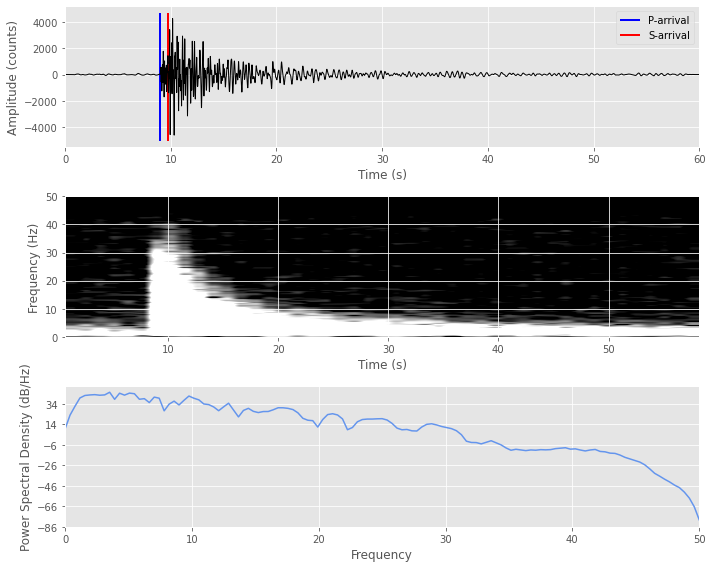

In [546]:
dtfl = h5py.File(eq1_sig_path, 'r')
dataset = dtfl.get('data/'+str(eq1_list[9000])) 
# waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel 
data = np.array(dataset)

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,8))
ax1.plot(np.linspace(0,60,6000),data[:,0],color='k',linewidth=1)
ymin, ymax = ax1.get_ylim()
ax1.vlines(dataset.attrs['p_arrival_sample']/100,ymin,ymax,color='b',linewidth=2, label='P-arrival')
ax1.vlines(dataset.attrs['s_arrival_sample']/100, ymin, ymax, color='r', linewidth=2, label='S-arrival')
ax1.set_xlim([0,60])
ax1.legend()
ax1.set_ylabel('Amplitude (counts)')
ax1.set_xlabel('Time (s)')
ax2.specgram(data[:,0],Fs=100,NFFT=256,cmap='gray',vmin=-10,vmax=20);
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('Time (s)')
#ax2.set_ylim([0,20])
ax3.psd(data[:,0],256,100,color='cornflowerblue')
ax3.set_xlim([0,50])
plt.tight_layout()

In [382]:
# get trace names of all image files in image file directory
dir = 'waves'
traces_array = []
for filename in os.listdir(dir):
    if filename.endswith('.png'):
        traces_array.append(filename[9:-4])

In [383]:
len(traces_array)
traces_array

['AKLV.AV_20171112092002_EV',
 'B087.PB_20150409131444_EV',
 'B087.PB_20171109033459_EV',
 'ACH.AV_20121121031631_EV',
 'AKSA.AV_20160719112853_EV',
 'B087.PB_20180102220736_EV',
 'AMKA.AV_20180116160312_NO',
 'ALEP.HV_20150503195836_EV',
 'B087.PB_20151025053450_EV',
 'ANNW.AV_20180115021630_NO',
 'ANGG.DK_20180116052406_NO',
 'B087.PB_20120404093336_EV',
 'ANTS.EC_20180115215354_NO',
 'AP01.C1_20180116094842_NO',
 'AF01.C1_20180115182436_NO',
 'B087.PB_20130304231744_EV',
 'A11.CN_20180116215600_NO',
 'B087.PB_20180402034040_EV',
 'B093.PB_20110418155939_EV',
 'ANNE.AV_20180115020518_NO',
 'B093.PB_20101010015119_EV',
 'B093.PB_20110708151100_EV',
 'ALEP.HV_20150424094451_EV',
 'AHUD.HV_20180505095158_EV',
 'B087.PB_20160926150507_EV',
 'ACCN.LD_20121016231253_EV',
 'AC04.C1_20180115105100_NO',
 'B087.PB_20120923042942_EV',
 'ADO.CI_20180115115112_NO',
 'B087.PB_20151107192907_EV',
 'B087.PB_20150327092356_EV',
 'B087.PB_20150601183547_EV',
 'AF01.C1_20180115094306_NO',
 'B087.PB_201

In [384]:
# select only the rows in the metadata dataframe which correspond to images
dataset = full_data.loc[full_data['trace_name'].isin(traces_array)]
labels = dataset['trace_category'] # target variable, 'earthquake' or 'noise'
labels = labels.map(lambda x: 1 if x == 'earthquake_local' else 0) # transform target variable to numerical categories
labels = np.array(labels)


In [361]:
traces_array

['AKS.AV_20170918083920_EV',
 'ANTS.EC_20180116142554_NO',
 'AAM1.ZQ_20070530012430_EV',
 'B087.PB_20121013201550_EV',
 'B093.PB_20110522034455_EV',
 'B093.PB_20110803061125_EV',
 'AUCH.AV_20180115040748_NO',
 'B087.PB_20120403064935_EV',
 'AKS.AV_20180115062212_NO',
 'AKH.GO_20120507154156_EV',
 'B093.PB_20111028184400_EV',
 'B087.PB_20120522144057_EV',
 'B087.PB_20150922124634_EV',
 'B087.PB_20111112020409_EV',
 'B087.PB_20120404141419_EV',
 'AIND.HV_20170225233155_EV',
 'ANPB.AV_20180115164842_NO',
 'ALEP.HV_20150907180818_EV',
 'AHUD.HV_20180712193335_EV',
 'AIS.G_20180115025418_NO',
 'ABPO.II_20180115040130_NO',
 'AIND.HV_20170807065910_EV',
 'AKS.AV_20180116152442_NO',
 'ANTS.EC_20180116092206_NO',
 'ANTS.EC_20180115111448_NO',
 'AMKA.AV_20180115160930_NO',
 'ACH.AV_20180426204720_EV',
 'AHUD.HV_20180620030322_EV',
 'AKS.AV_20180116012112_NO',
 'B087.PB_20131112034324_EV',
 'AKS.AV_20180115054548_NO',
 'B087.PB_20151211124422_EV',
 'B087.PB_20111108210934_EV',
 'B087.PB_201302082

In [385]:
img= cv2.imread(dir+'/fig_wave_'+dataset['trace_name'].iloc[50000]+'.png',0) # read in image as grayscale image
img_array = np.ravel(img)
img_array.shape

(12100,)

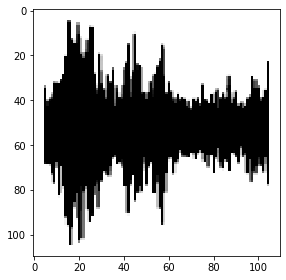

In [386]:
# example image, read in as grayscale
img= cv2.imread(dir+'/fig_wave_'+dataset['trace_name'].iloc[50000]+'.png',0) # read in image as grayscale image
img_array = np.ravel(img)
img_array.shape
io.imshow(img)

In [387]:
dataset['trace_name']

0        109C.TA_20060723155859_EV
1        109C.TA_20061103155652_EV
2        109C.TA_20061103161223_EV
3        109C.TA_20061114133221_EV
4        109C.TA_20061127104640_EV
                   ...            
19995    AUWS.AV_20180115190554_NO
19996    AUWS.AV_20180115190718_NO
19997    AUWS.AV_20180115190800_NO
19998    AUWS.AV_20180115190924_NO
19999    AUWS.AV_20180115191418_NO
Name: trace_name, Length: 60000, dtype: object

In [389]:
# create an array of all images
imgs = []
for i in range(0,len(dataset['trace_name'])):
    img= cv2.imread(dir+'/fig_wave_'+dataset['trace_name'].iloc[i]+'.png',0) # read in image as grayscale image
    imgs.append(img)
imgs = np.array(imgs)
imgs.shape

(60000, 110, 110)

1

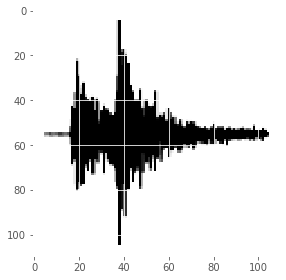

In [519]:
# plot one example image and label from the dataset
io.imshow(imgs[0])
labels[0]


In [400]:
# train test split on images, 75% training data and 25% testing data
train_images, test_images, train_labels, test_labels = train_test_split(imgs,labels,random_state=41)
print(X_train.shape)
print(y_train.shape)
train_images = train_images/255.0 # scale intensity to between 0 and 1
test_images = test_images/255.0 # scale intensity to between 0 and 1

(45000, 100, 100)
(45000,)


In [401]:
train_images = train_images.reshape(-1,110,110,1)
test_images = test_images.reshape(-1,110,110,1)

In [402]:
# build CNN
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten(input_shape=(110,110)))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))

In [403]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1407/1407 [==============================] - 103s 73ms/step - loss: 1.2035 - accuracy: 0.8139
Epoch 2/5
1407/1407 [==============================] - 99s 70ms/step - loss: 0.2484 - accuracy: 0.9421
Epoch 3/5
1407/1407 [==============================] - 99s 71ms/step - loss: 0.1351 - accuracy: 0.9707
Epoch 4/5
1407/1407 [==============================] - 100s 71ms/step - loss: 0.1034 - accuracy: 0.9727
Epoch 5/5
1407/1407 [==============================] - 100s 71ms/step - loss: 0.0802 - accuracy: 0.9726


In [503]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("\nTest data, accuracy: {:5.2f}%".format(100*test_acc))


469/469 [==============================] - 7s 16ms/step - loss: 0.0303 - accuracy: 0.9927

Test data, accuracy: 99.27%


In [377]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 100, 100, 32)      832       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 80000)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                1280016   
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

In [509]:
predicted = model.predict_classes(test_images)
predicted_probs = model.predict_proba(test_images)


/Users/kaelynnrose/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/kaelynnrose/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([0, 1, 1, ..., 1, 1, 1])

In [508]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,predicted) # compare target values to predicted values and show confusion matrix
print(cm)
accuracy = accuracy_score(test_labels,predicted)
precision = precision_score(test_labels,predicted)
recall = recall_score(test_labels,predicted)
print(f'The accuracy of the model is {accuracy}, the precision is {precision}, and the recall is {recall}.')

[[4937   68]
 [  41 9954]]
The accuracy of the model is 0.9927333333333334, the precision is 0.9932149271602475, and the recall is 0.9958979489744872.


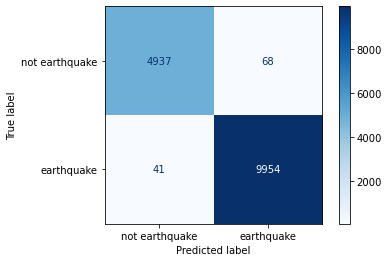

In [440]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not earthquake','earthquake'])
disp.plot(cmap='Blues') 

In [444]:
# get a list of the indices where the model predicted the test labels incorrectly
incorrect_preds = []
for i in range(0,len(test_labels)):
    if test_labels[i] != predicted[i]:
        incorrect_preds.append(i)

The correct label was 0
The label predicted by the CNN model was 1


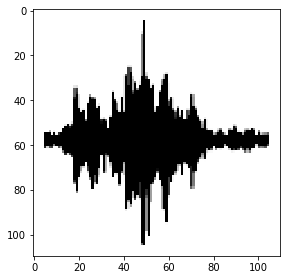

In [457]:
# see examples of incorrectly predicted images and what the true label was
io.imshow(test_images[incorrect_preds[0]])
print('The correct label was '+ str(test_labels[incorrect_preds[0]]))
print('The label predicted by the CNN model was '+ str(predicted[incorrect_preds[0]]))

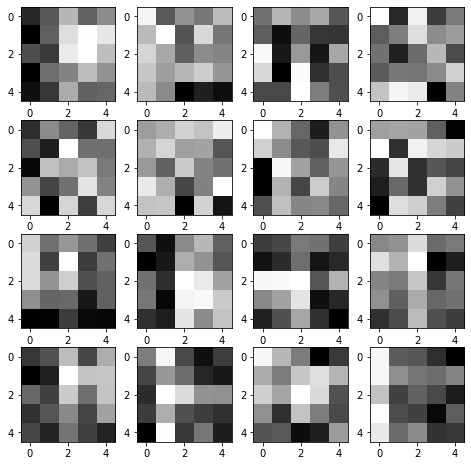

In [461]:
weights1_np = model.get_weights()[0] # 5 5 1 16

fig, axs = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axs.flatten()):
    filter = weights1_np[:, :, 0, i]
    ax.imshow(filter, cmap=plt.cm.gray_r, interpolation="nearest")

